In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# La loi de stephan boltzmann
___

La puissance surfacique totale émise par un corps noir est donnée par la loi de Stefan-Boltzmann.

Cette loi permet de déterminer la température d'un corps à partir de la quantité de rayonnement qu'il émet.

In [3]:
def stephan_boltzmann(temperature):
    if temperature < 100:
        temperature += 273.15 # Passage en Kelvin
    sigma = 5.670E-8 # En W.m⁻².K⁻⁴
    M = sigma * temperature**4 # Puissance surfacique en W/m²
    return M

In [4]:
liste_rayonnement = []
for t in range(6000):
    liste_rayonnement.append(stephan_boltzmann(t))

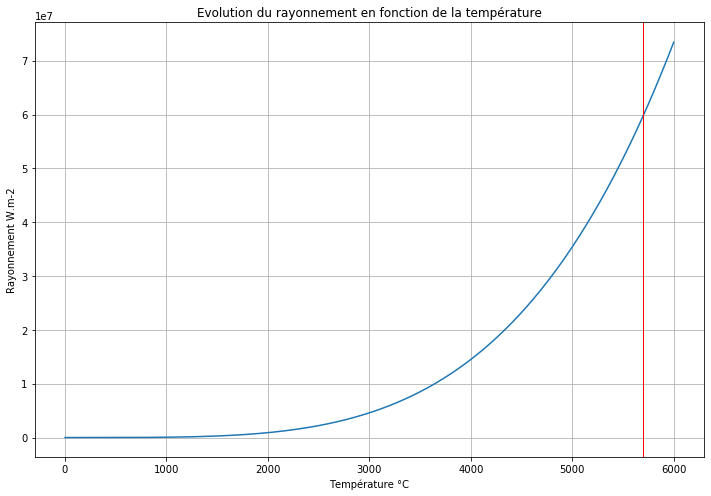

In [5]:
plt.figure(figsize=(12,8))
plt.plot(liste_rayonnement)
plt.title('Evolution du rayonnement en fonction de la température')
plt.axvline(x=5700, linewidth=1, color='red') # Température du Soleil
plt.grid()
plt.xlabel('Température °C')
plt.ylabel('Rayonnement W.m-2')
plt.show()

Concrètement, plus un corps est chaud, pour son rayonnement est important.

# Loi de Planck
___

La loi de Planck donne la distribution spectrale de la puissance surfacique du rayonnement émis par un corps noir.

Le corps noir est un corps théorique permettant de modéliser l'émission thermique de rayonnement électromagnétique. Il présente les trois propriétés suivantes :

- Le corps noir absorbe tous les rayonnements, quelque soient leur longueur d'onde et leur direction.
- Pour une température et une longueur d'onde données, le rayonnement thermique d'un corps réel est inférieur à celui du corps noir.
- Le corps noir émet de manière diffuse, c.a.d. indépendamment de la direction.


In [6]:
def loi_planck(longueur_onde, temperature):
    h = 6.626E-34 # constante de Planck m².kg/s
    c = 299792458 # vitesse de la lumière m/s
    k = 1.38e-23 # constante de boltzmann m².kg.s⁻².K⁻¹
    longueur_onde = longueur_onde * 1E-6 # Pour passer les longueurs d'ondes en micromètres
    
    numerateur = 2*math.pi*h*c**2
    denominateur = (longueur_onde**5)*(math.exp((h*c)/(longueur_onde*k*temperature)) - 1)
    E = numerateur / denominateur # E en W/m²/micrometre 

    return E

En bonne approximation, on peut assimiler le Soleil à un corps noir à 5800 K.

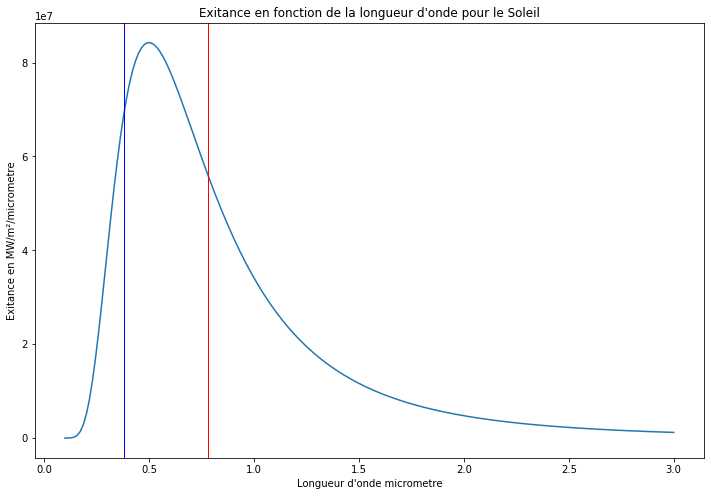

In [7]:
longueur_onde = np.linspace(0.1,3,200)
T = 5800 # Température du Soleil en Kelvin
liste_E = [] # Liste qui vas receuillir les différentes valeurs d'exitance pour les différentes longueurs d'ondes.

for i in longueur_onde:
    liste_E.append(loi_planck(i,T)/1E6) # Je divise le résultat par 10*6 pour obtenir un résultat en MW.

plt.figure(figsize=(12,8))
plt.plot(longueur_onde, liste_E)
plt.title("Exitance en fonction de la longueur d'onde pour le Soleil")
plt.axvline(x=0.380, linewidth=1, color='b') # Borne inférieure du spectre visible
plt.axvline(x=0.780, linewidth=1, color='red') # Borne supérieure du spectre visible
plt.xlabel("Longueur d'onde micrometre")
plt.ylabel("Exitance en MW/m²/micrometre")
plt.show()



On constate que le Soleil émet à la fois dans l'ultraviolet, le visible et l'infrarouge.

Pour connaître la puissance surfacique totale émise par le Soleil, il faut calculer l'aire sous la courbe, c'est à dire faire l'intégrale de la fonction E. Le calcul de cette intégrale conduit à la loi de Stefan-Boltzmann explicitée ci-dessus.

Approximativement on trouve une puissance totale émise par le soleil de :

In [8]:
print(f"Puissance totale émise par le Soleil : {stephan_boltzmann(5700)} W.m⁻² soit {stephan_boltzmann(5700)/1E6} MW.m⁻²")

Puissance totale émise par le Soleil : 59852525.67 W.m⁻² soit 59.85252567 MW.m⁻²


# Comparaison du rayonnement de la Terre et du Soleil
___

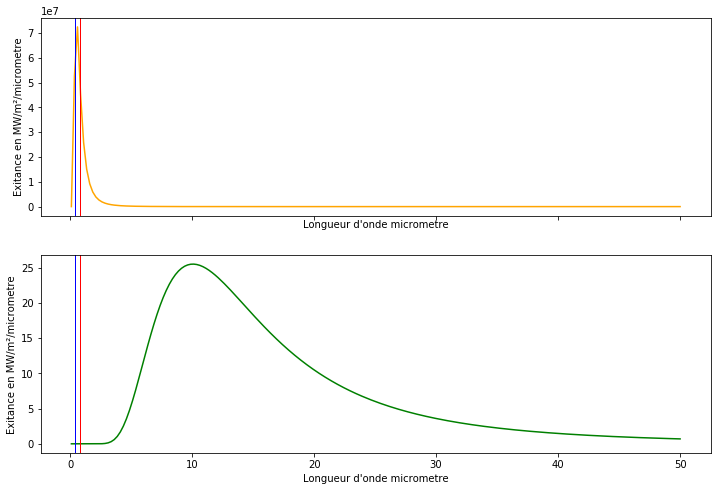

In [31]:
longueur_onde = np.linspace(0.1,50,200)
T_soleil = 5700 # Kelvin
T_terre = 15+273.15 # Kelvin
liste_E_soleil = []
liste_E_terre = []

for i in longueur_onde:
    liste_E_soleil.append(loi_planck(i, T_soleil)/1E6)
    liste_E_terre.append(loi_planck(i,T_terre)/1E6)

fig, ax = plt.subplots(2,1, sharex=True, figsize=(12,8))
ax[0].plot(longueur_onde, liste_E_soleil, label="Emission Soleil", c='orange')
ax[0].set_xlabel("Longueur d'onde micrometre")
ax[0].set_ylabel("Exitance en MW/m²/micrometre")
ax[0].axvline(x=0.380, linewidth=1, color='b') # Borne inférieure du spectre visible
ax[0].axvline(x=0.780, linewidth=1, color='red') # Borne supérieure du spectre visible)

ax[1].plot(longueur_onde, liste_E_terre, label="Emission Terre", c='g')
ax[1].set_xlabel("Longueur d'onde micrometre")
ax[1].set_ylabel("Exitance en MW/m²/micrometre")
ax[1].axvline(x=0.380, linewidth=1, color='b') # Borne inférieure du spectre visible
ax[1].axvline(x=0.780, linewidth=1, color='red') # Borne supérieure du spectre visible)

plt.show()

On constate que le Soleil émet beaucoup plus d'énergie que la Terre. De plus, le rayonnement émis par la Terre est principalement dans l'infrarouge, alors que celui du Soleil est principalement dans le visible.